In [140]:
import numpy as np
import pandas as pd
import random, os, math, tqdm, pickle
import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from realsys_utils import *
from datetime import datetime
import yaml, pickle, tqdm
from muller_utils import success_cluster_identification

In [124]:
directory = 'results/peptide/ogn/run_240212_1831'
params = yaml.load(open(os.path.join(directory,'param.yaml'), 'r'), Loader=yaml.FullLoader)
init_traj_index = params['init_traj_index']
feature1_path = params['feature1_path']
feature2_path = params['feature2_path']
feature1 = pd.read_pickle(feature1_path) # a9
feature2 = pd.read_pickle(feature2_path) #20
traj = combine_trajectories(feature1, feature2)


result = pd.read_pickle(os.path.join(directory,'results.pkl'))
all_traj = result['all_traj']
all_traj_stacked = np.vstack(all_traj)
outer = result['outer']
inner = result['inner']
iteration_counter = result['iteration_counter']
iteration_counter_list = iteration_counter_converter(iteration_counter)

In [125]:
proposed_inits, new_inits, prev_lasts, updates = get_data_for_figures(inner)

In [69]:
x_limits = [1.25, 2.95]
y_limits = [1.25, 2.95]
x_label='A9 O-C-N angle (rad)'
y_label='R20 O-C-C angle (rad)'
ft=15

# All data

In [68]:
init_traj_index = 4

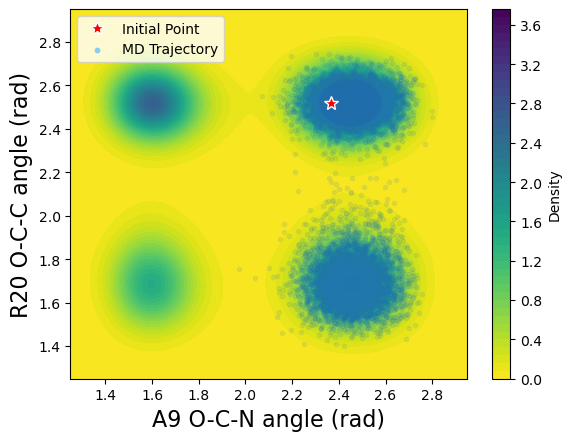

In [70]:
#init_traj_index = 4 #15
density_contour(traj[15], xlabel=x_label, ylabel=y_label)
plt.scatter(traj[init_traj_index][:,0], traj[init_traj_index][:,1], 
            marker='.', 
            #edgecolors='blue',
            alpha=0.1) #, c='orange')
plt.plot(traj[init_traj_index][0, 0], traj[init_traj_index][0, 1], '*', 
         markeredgecolor='white', color='r', 
         markersize=10, label='Initial Point')
plt.scatter([], [], c='skyblue', label='MD Trajectory', s=10)
plt.xlim(x_limits)
plt.ylim(y_limits)
plt.legend(fontsize=ft-5, loc='upper left')

plt.savefig(os.path.join(directory, 'all_data_MD.png'), 
            dpi=300, bbox_inches='tight')

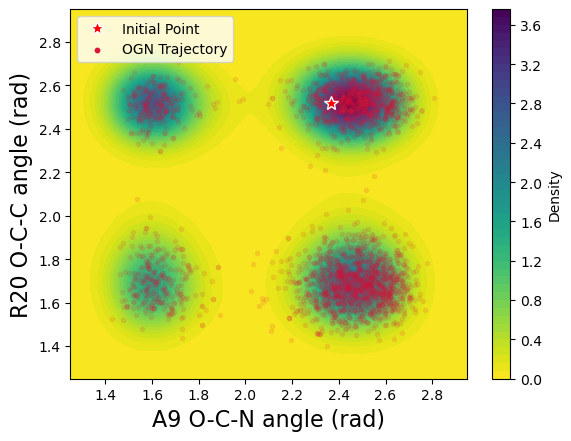

In [71]:
# init_traj_index = 4 #15
color = 'crimson'
density_contour(traj[15], xlabel=x_label, ylabel=y_label)
plt.scatter(all_traj_stacked[:,0], all_traj_stacked[:,1], 
            marker='.', 
            #edgecolors='blue',
            c=color,
            alpha=0.1) 
plt.plot(traj[init_traj_index][0, 0], traj[init_traj_index][0, 1], '*', 
         markeredgecolor='white', color='r', 
         markersize=10, label='Initial Point')
plt.scatter([], [], c=color, label='OGN Trajectory', s=10)
plt.xlim(x_limits)
plt.ylim(y_limits)
plt.legend(fontsize=ft-5, loc='upper left')

plt.savefig(os.path.join(directory, 'all_data_OGN.png'), 
            dpi=300, bbox_inches='tight')

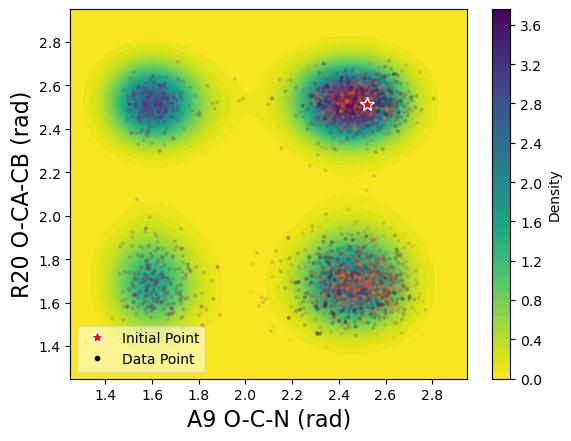

In [67]:
colors = cm.inferno(np.linspace(0, 0.8, len(all_traj)))
density_contour(traj[15], xlabel=x_label, ylabel=y_label)
plt.plot(all_traj[0][0, 0], all_traj[0][0, 1], '*', 
         markeredgecolor='white', color='r', 
         markersize=10, label='Initial Point')
i=0
for n in range(len(all_traj)): 
    c = colors[n]
    x = all_traj[n][:,0]
    y = all_traj[n][:,1]
    plt.scatter(x, y, edgecolor='none', s=8, color=c, alpha=0.2) #, label=f'Run {i+1}')
    i += 1

plt.xlim(x_limits[0], x_limits[1])
plt.ylim(y_limits[0], y_limits[1])

# plt.plot([], [], '*', c='r', label='Initial Point')
plt.plot([], [], '.', c='k', label='Data Point')  # 'o' for circle markers

plt.legend(fontsize=ft-5, loc='lower left', framealpha=0.5)

# plt.legend(fontsize=ft-5, loc='lower left')
# plt.savefig(os.path.join(directory,'all_points.png'), bbox_inches='tight', facecolor='w')
plt.savefig(os.path.join(directory, 'all_data_OGN_type2.png'), 
            dpi=300, bbox_inches='tight')

# Update rate

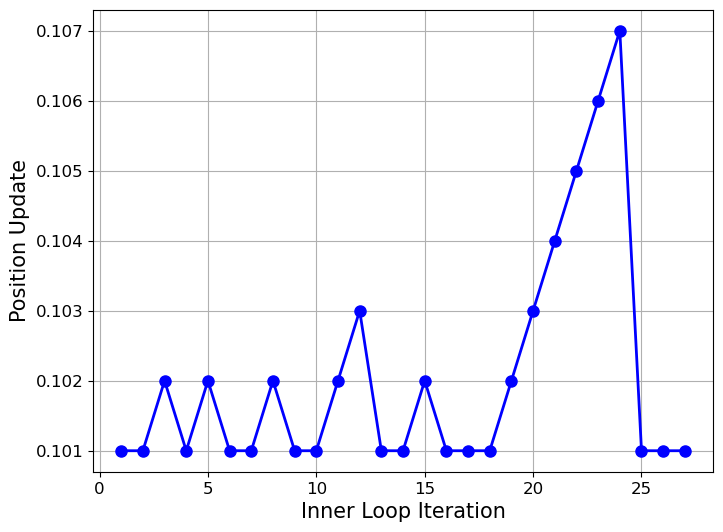

In [35]:
# Create the plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the data
iteration = np.arange(1, len(updates) + 1)
plt.plot(iteration, updates, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)

# Add labels and title
plt.xlabel('Inner Loop Iteration', fontsize=15)
plt.ylabel('Position Update', fontsize=15)
# plt.title('Position Update vs. Iteration', fontsize=16)

# Increase the tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(True)

# Save the plot as an image (optional)
plt.savefig(os.path.join(directory, 'update_rate.png'), 
            dpi=300, bbox_inches='tight')

# Update arrow (proposed)

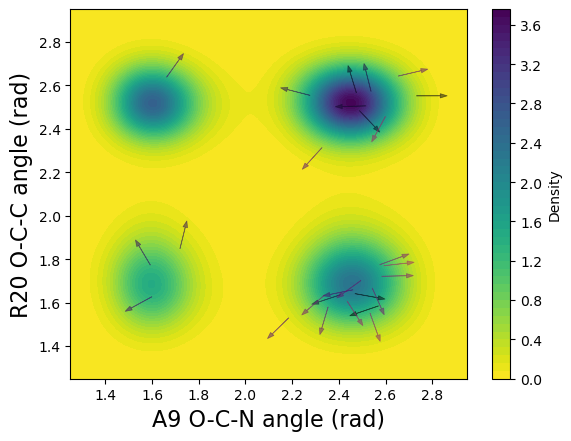

In [72]:
colors = cm.inferno(np.linspace(0, 0.8, len(all_traj)))
density_contour(traj[15], xlabel=x_label, ylabel=y_label)
i = 0
for prev, upd in zip(prev_lasts, proposed_inits): 
    c = colors[i]
    x_prev, y_prev = prev
    x_upd, y_upd = upd
    plt.arrow(x_prev, y_prev, x_upd-x_prev, y_upd-y_prev, 
              color=c, head_width = .02, linewidth=0.5, alpha=0.5)
    i += 1
plt.xlim(x_limits[0], x_limits[1])
plt.ylim(y_limits[0], y_limits[1])
plt.savefig(os.path.join(directory, 'arrow_proposed.png'), 
            dpi=300, bbox_inches='tight')

# Update arrow (actual)

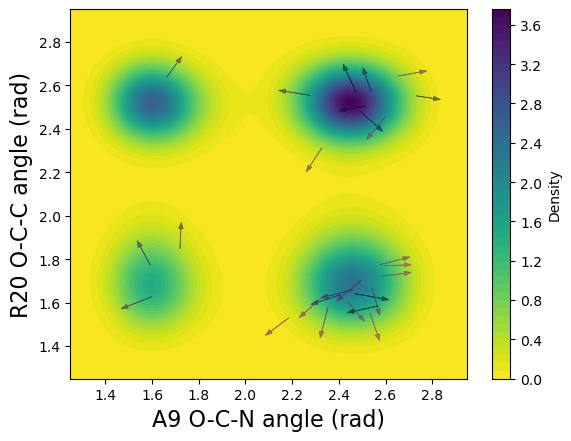

In [73]:
colors = cm.inferno(np.linspace(0, 0.8, len(all_traj)))
density_contour(traj[15], xlabel=x_label, ylabel=y_label)
i = 0
for prev, upd in zip(prev_lasts, new_inits): 
    c = colors[i]
    x_prev, y_prev = prev
    x_upd, y_upd = upd
    plt.arrow(x_prev, y_prev, x_upd-x_prev, y_upd-y_prev, 
              color=c, head_width = .02, linewidth=0.5, alpha=0.5)
    i += 1
plt.xlim(x_limits[0], x_limits[1])
plt.ylim(y_limits[0], y_limits[1])
plt.savefig(os.path.join(directory, 'arrow_actual.png'), 
            dpi=300, bbox_inches='tight')

# Descrepancy between proposed and actual inits

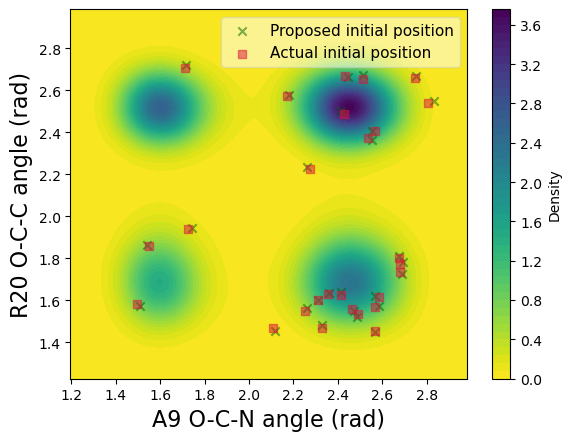

In [80]:
density_contour(traj[15], xlabel=x_label, ylabel=y_label)
#plt.scatter(prev_lasts[:,0], prev_lasts[:,1], color='blue', marker='.', label='prev last')
plt.scatter(proposed_inits[:,0], proposed_inits[:,1], color='darkgreen', alpha=0.5, marker='x', label='Proposed initial position')
plt.scatter(new_inits[:,0], new_inits[:,1], color='crimson', marker='s', alpha=0.5, label='Actual initial position')
plt.legend(fontsize=ft-4, loc='best', framealpha=0.5)
plt.savefig(os.path.join(directory, 'init_delta.png'), 
            dpi=300, bbox_inches='tight')

# Energy Curve Reconstruction

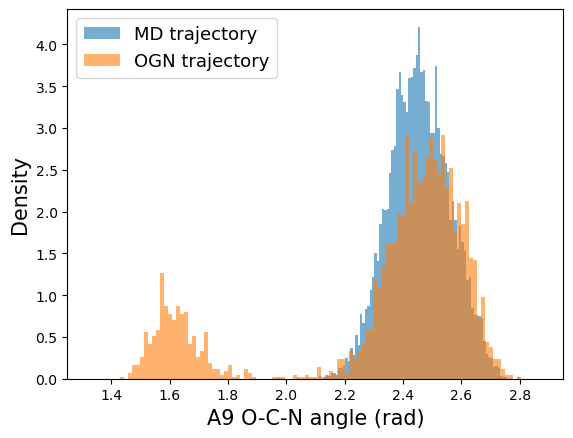

In [78]:
plt.hist(traj[init_traj_index][:,0], bins=100, density=True, alpha=0.6, label='MD trajectory')
plt.hist(all_traj_stacked[:,0], bins=100, density=True, alpha=0.6, label='OGN trajectory')
plt.xlabel(x_label, fontsize=ft)
plt.ylabel('Density', fontsize=ft)
plt.xlim(y_limits)
# plt.title('Distribution of Distance from Start Point')
plt.legend(fontsize=ft-2, loc='best')
plt.savefig(os.path.join(directory, 'histogram.png'), 
            dpi=300, bbox_inches='tight')


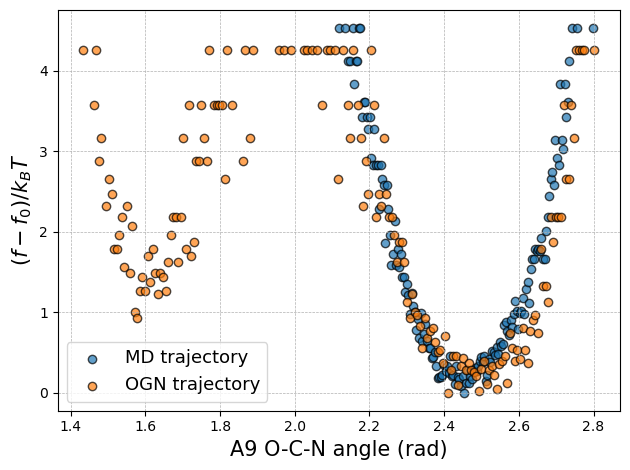

In [77]:
anchors_md, fn_md = reconstruct_energy(traj[init_traj_index][:,0], 200)
anchors_ogn, fn_ogn = reconstruct_energy(all_traj_stacked[:,0], 200)

# Visualize the results with improved aesthetics
plt.scatter(anchors_md, fn_md, alpha=0.7, edgecolor='black', label='MD trajectory')
plt.scatter(anchors_ogn, fn_ogn, alpha=0.7, edgecolor='black', label='OGN trajectory')

plt.xlabel(x_label, fontsize=ft)
plt.ylabel(r"$(f - f_0) / k_B T$", fontsize=ft)

# plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(fontsize=ft-2, loc='best')
plt.savefig(os.path.join(directory, 'recon_E.png'), 
            dpi=300, bbox_inches='tight')

# SSIR - Initial points on grid

(1.25, 2.95)

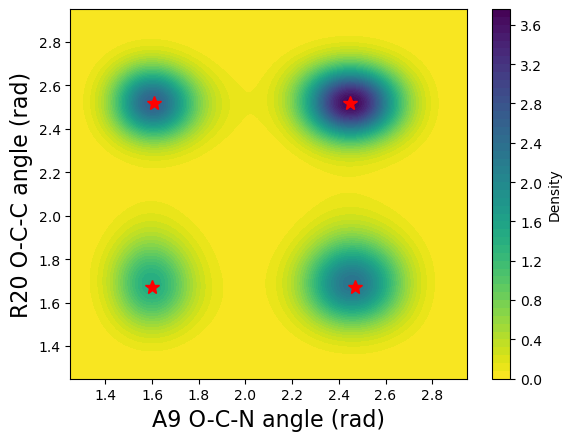

In [85]:
density_contour(traj[15], xlabel=x_label, ylabel=y_label)

center_points = np.array([[1.61, 2.52], [2.45, 2.52], 
                          [1.6, 1.67], [2.47, 1.67]])
for i in range(center_points.shape[0]):
    plt.plot(center_points[i, 0], center_points[i, 1], '*', color='r', markersize=10)

plt.xlim(x_limits)
plt.ylim(y_limits)

In [112]:
total_num_success = 0
total_num_clusters = 0
valid_init = []

for i in tqdm.tqdm(range(1,29)):
    init = traj[i][0]
    num_identified_cluster = success_cluster_identification(traj[i], 
                                                            center_points, 
                                                            distance_threshold=0.1, 
                                                            number_threshold=5)
    total_num_success += num_identified_cluster
    total_num_clusters += len(center_points)
    init = np.append(init, num_identified_cluster)
    valid_init.append(init)

valid_init = np.array(valid_init)
ssir = total_num_success / total_num_clusters 

100%|██████████| 28/28 [00:03<00:00,  7.43it/s]


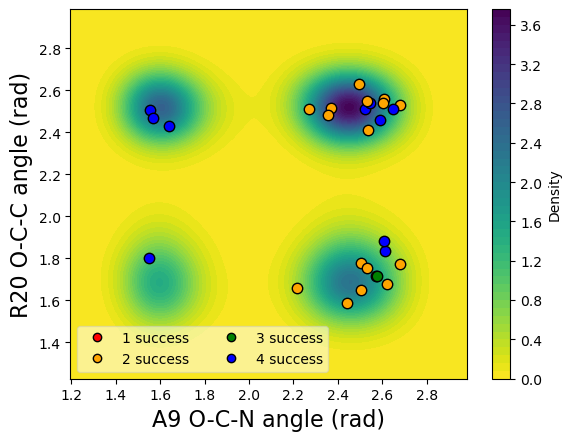

In [117]:
# Define colors for each value
colors = {1: 'red', 2: 'orange', 3: 'green', 4: 'blue'}

density_contour(traj[15], xlabel=x_label, ylabel=y_label)

# Loop through each point and plot it with the corresponding color
for point in valid_init:
    plt.plot(point[0], point[1], '.', 
             color=colors[point[-1]], markeredgecolor='black', markersize=15)
    # plt.text(point[0], point[1], f'{point[3]}', color='black', fontsize=9, ha='right', va='bottom')
    #plt.text(point[0], point[1], f'{int(point[3])}', color='black', fontsize=11) #, ha='right', va='bottom')
for i in range(len(colors)):
    plt.plot([], [], '.', color=list(colors.values())[i], 
             markeredgecolor='black', markersize=12, label=f'{i+1} success')
plt.legend(fontsize=ft-5, loc='lower left', framealpha=0.5, ncol=2)

plt.savefig(os.path.join(directory, 'ssir_md.png'), 
            dpi=300, bbox_inches='tight')

In [136]:
total_num_success = 0
total_num_clusters = 0
valid_init = []
path = "results/peptide/ogn/ssir_240212_2053"
for i in tqdm.tqdm(range(1,5)):
    results = pd.read_pickle(os.path.join(path, f'traj_{i}/results.pkl'))
    
    iter_traj = results['all_traj']
    iter_traj = np.vstack(iter_traj)
    
    init = iter_traj[0]
    num_identified_cluster = success_cluster_identification(iter_traj, 
                                                            center_points, 
                                                            distance_threshold=0.1, 
                                                            number_threshold=5)
    total_num_success += num_identified_cluster
    total_num_clusters += len(center_points)
    init = np.append(init, num_identified_cluster)
    valid_init.append(init)

valid_init = np.array(valid_init)
ssir = total_num_success / total_num_clusters 

100%|██████████| 4/4 [00:00<00:00, 24.03it/s]


In [139]:
ssir

0.875

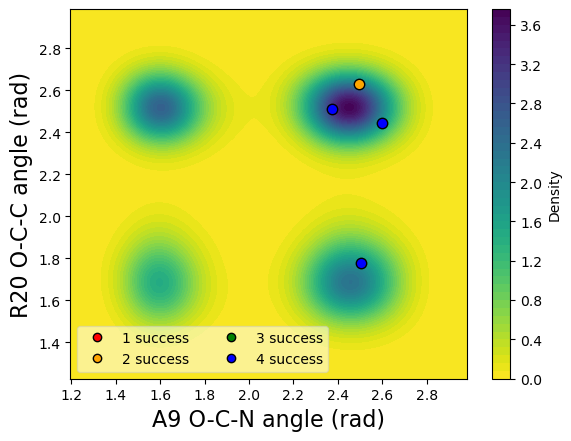

In [138]:
# Define colors for each value
colors = {1: 'red', 2: 'orange', 3: 'green', 4: 'blue'}

density_contour(traj[15], xlabel=x_label, ylabel=y_label)

# Loop through each point and plot it with the corresponding color
for point in valid_init:
    plt.plot(point[0], point[1], '.', 
             color=colors[point[-1]], markeredgecolor='black', markersize=15)
    # plt.text(point[0], point[1], f'{point[3]}', color='black', fontsize=9, ha='right', va='bottom')
    #plt.text(point[0], point[1], f'{int(point[3])}', color='black', fontsize=11) #, ha='right', va='bottom')
for i in range(len(colors)):
    plt.plot([], [], '.', color=list(colors.values())[i], 
             markeredgecolor='black', markersize=12, label=f'{i+1} success')
plt.legend(fontsize=ft-5, loc='lower left', framealpha=0.5, ncol=2)

plt.savefig(os.path.join(directory, 'ssir_ogn.png'), 
            dpi=300, bbox_inches='tight')